In [498]:
import pandas as pd
import json as js
import csv
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Times New Roman",
})

In [499]:
algo = pd.read_csv("data/algo-10pods.csv")
kube = pd.read_csv("data/all-kube-10pods.csv")
faas = pd.read_csv("data/all-openfaas-5-to-100.csv")

In [500]:
kube.head()

,Label,# Samples,Average,Median,90% Line,95% Line,99% Line,Min,Max,Error %,Throughput,Received KB/sec,Sent KB/sec
0,Quick API 5,5,15,12,20,22,22,9,22,0.000%,0.20852,0.03,0.03
1,Compute API 5,5,566,560,571,596,596,552,596,0.000%,0.20395,0.03,0.03
2,Read API 5,5,15,9,22,31,31,8,31,0.000%,0.20896,0.03,0.03
3,Write API 5,5,576,572,576,627,627,550,627,0.000%,0.20432,0.03,0.03
4,Quick API 25,25,48,8,149,276,281,7,281,0.000%,0.86781,0.13,0.11


In [501]:
faas.head()

,Label,# Samples,Average,Median,90% Line,95% Line,99% Line,Min,Max,Error %,Throughput,Received KB/sec,Sent KB/sec
0,Quick API 5,5,20,18,28,32,32,11,32,0.000%,0.20821,0.06,0.03
1,Compute API 5,5,611,608,631,644,644,587,644,0.000%,0.20333,0.06,0.03
2,Read API 5,5,17,14,15,37,37,9,37,0.000%,0.20858,0.06,0.03
3,Write API 5,5,616,618,623,634,634,602,634,0.000%,0.20351,0.06,0.03
4,Quick API 25,25,10,9,12,15,15,8,15,0.000%,0.86766,0.27,0.11


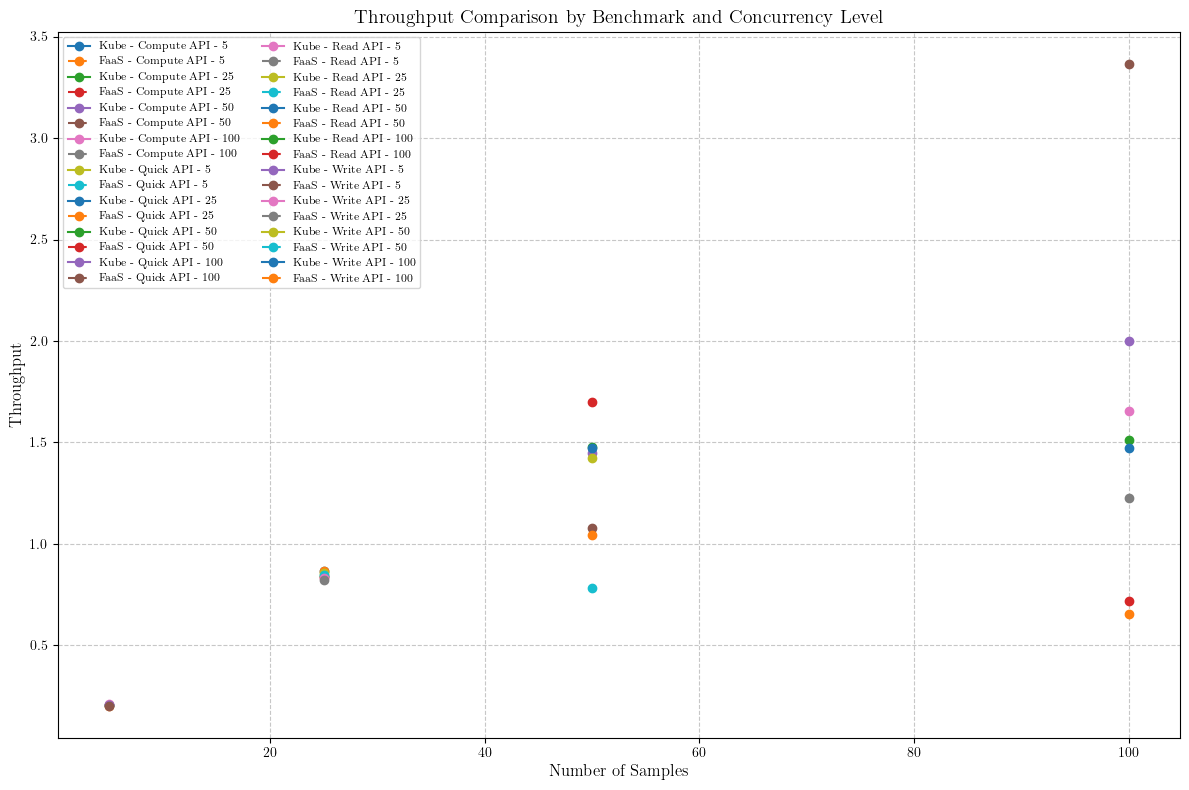

In [502]:
# Ensure labels are consistent between kube and faas datasets
unique_labels = ['Compute API', 'Quick API', 'Read API', 'Write API']


# Plot setup
plt.figure(figsize=(12, 8))

# Iterate through each unique label (benchmark)
for label in unique_labels:
    for concurrency in [5, 25, 50, 100]:
        # Filter data for the current label and concurrency in both datasets
        kube_data = kube[(kube['Label'] == f"{label} {concurrency}")]
        faas_data = faas[(faas['Label'] == f"{label} {concurrency}")]
        
        # Plot Kube data for this concurrency
        if not kube_data.empty:
            plt.plot(
                kube_data['# Samples'],
                kube_data['Throughput'],
                marker='o',
                label=f'Kube - {label} - {concurrency}'
            )
        
        # Plot FaaS data for this concurrency
        if not faas_data.empty:
            plt.plot(
                faas_data['# Samples'],
                faas_data['Throughput'],
                marker='o',
                linestyle='--',  # Dashed line for FaaS
                label=f'FaaS - {label} - {concurrency}'
            )

# Labels and title
plt.xlabel('Number of Samples', fontsize=12)
plt.ylabel('Throughput', fontsize=12)
plt.title('Throughput Comparison by Benchmark and Concurrency Level', fontsize=14)
plt.legend(loc='upper left', fontsize=8, ncol=2)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

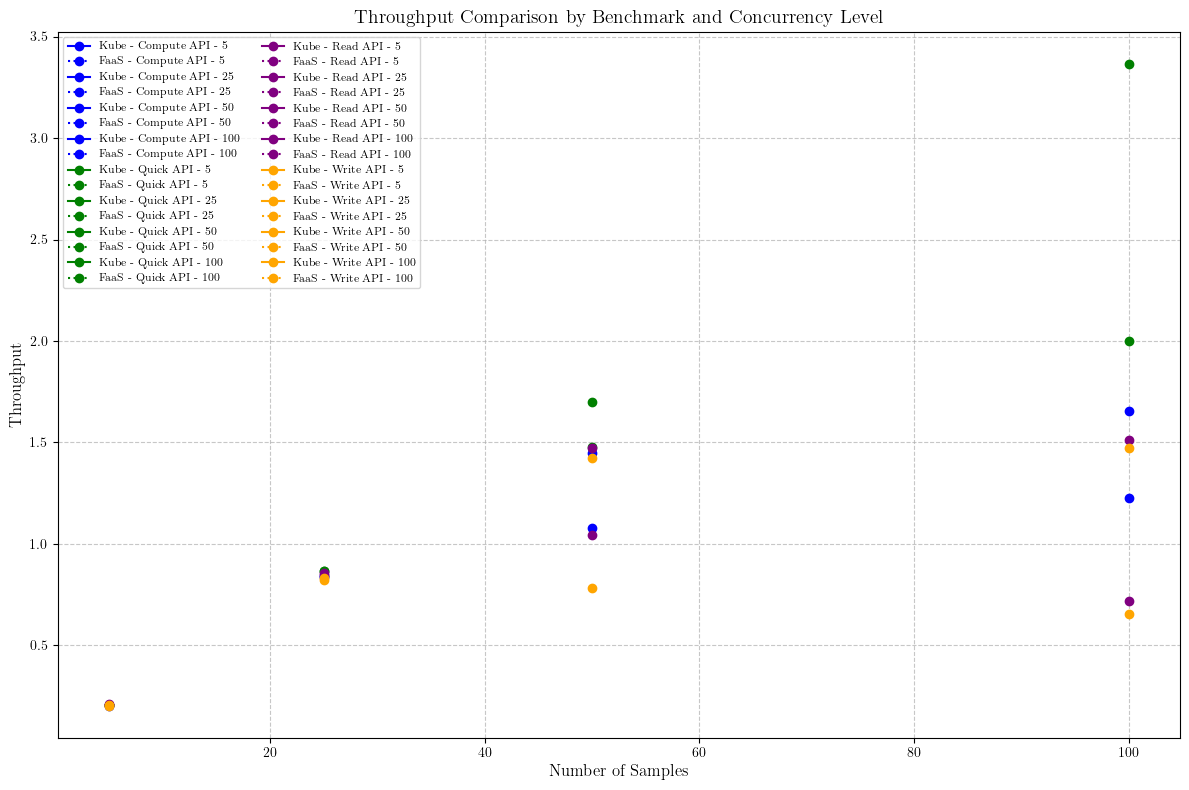

In [503]:
# Predefined colors for consistency between Kube and FaaS
colors = {
    'Compute API': 'blue',
    'Quick API': 'green',
    'Read API': 'purple',
    'Write API': 'orange'
}

# Plot setup
plt.figure(figsize=(12, 8))

# Iterate through each unique label (benchmark)
for label in unique_labels:
    for concurrency in [5, 25, 50, 100]:
        # Filter data for the current label and concurrency in both datasets
        kube_data = kube[(kube['Label'] == f"{label} {concurrency}")]
        faas_data = faas[(faas['Label'] == f"{label} {concurrency}")]
        
        # Set color for the benchmark
        color = colors.get(label, 'black')  # Default to black if label not found
        
        # Plot Kube data for this concurrency
        if not kube_data.empty:
            plt.plot(
                kube_data['# Samples'],
                kube_data['Throughput'],
                marker='o',
                color=color,
                label=f'Kube - {label} - {concurrency}'
            )
        
        # Plot FaaS data for this concurrency
        if not faas_data.empty:
            plt.plot(
                faas_data['# Samples'],
                faas_data['Throughput'],
                marker='o',
                linestyle=':',
                color=color,  # Same color as Kube counterpart
                label=f'FaaS - {label} - {concurrency}'
            )

# Labels and title
plt.xlabel('Number of Samples', fontsize=12)
plt.ylabel('Throughput', fontsize=12)
plt.title('Throughput Comparison by Benchmark and Concurrency Level', fontsize=14)
plt.legend(loc='upper left', fontsize=8, ncol=2)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

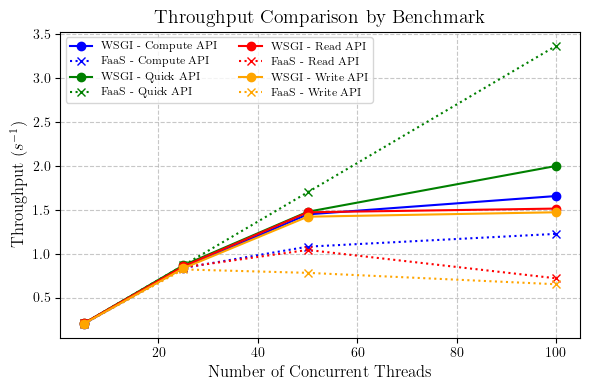

In [504]:
# Predefined colors for consistency between Kube and FaaS
colors = {
    'Compute API': 'blue',
    'Quick API': 'green',
    'Read API': 'red',
    'Write API': 'orange'
}

# Plot setup
plt.figure(figsize=(6, 4))

# Iterate through each unique label (benchmark)
for label in unique_labels:
    # Filter data for the current label across all concurrency levels
    kube_data = kube[kube['Label'].str.contains(label)]
    faas_data = faas[faas['Label'].str.contains(label)]
    
    # Set color for the benchmark
    color = colors.get(label, 'black')  # Default to black if label not found
    
    # Plot Kube data as a single line
    if not kube_data.empty:
        plt.plot(
            kube_data['# Samples'],
            kube_data['Throughput'],
            marker='o',
            color=color,
            label=f'WSGI - {label}'
        )
    
    # Plot FaaS data as a single line
    if not faas_data.empty:
        plt.plot(
            faas_data['# Samples'],
            faas_data['Throughput'],
            marker='x',
            linestyle=':',
            color=color,  # Same color as Kube counterpart
            label=f'FaaS - {label}'
        )

# Labels and title
plt.xlabel('Number of Concurrent Threads', fontsize=12)
plt.ylabel(r'Throughput ($s^{-1}$)', fontsize=12)
plt.title('Throughput Comparison by Benchmark', fontsize=14)
plt.legend(loc='upper left', fontsize=8, ncol=2)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig('throughput-comparison.pdf', dpi=300)
plt.show()

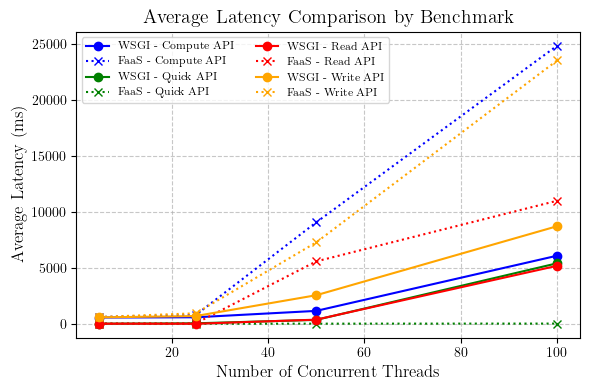

In [505]:
# Predefined colors for consistency between Kube and FaaS
colors = {
    'Compute API': 'blue',
    'Quick API': 'green',
    'Read API': 'red',
    'Write API': 'orange'
}

# Plot setup
plt.figure(figsize=(6, 4))

# Iterate through each unique label (benchmark)
for label in unique_labels:
    # Filter data for the current label across all concurrency levels
    kube_data = kube[kube['Label'].str.contains(label)]
    faas_data = faas[faas['Label'].str.contains(label)]
    
    # Set color for the benchmark
    color = colors.get(label, 'black')  # Default to black if label not found
    
    # Plot Kube data as a single line
    if not kube_data.empty:
        plt.plot(
            kube_data['# Samples'],
            kube_data['Average'],
            marker='o',
            color=color,
            label=f'WSGI - {label}'
        )
    
    # Plot FaaS data as a single line
    if not faas_data.empty:
        plt.plot(
            faas_data['# Samples'],
            faas_data['Average'],
            marker='x',
            linestyle=':',
            color=color,  # Same color as Kube counterpart
            label=f'FaaS - {label}'
        )

# Labels and title
plt.xlabel('Number of Concurrent Threads', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('Average Latency Comparison by Benchmark', fontsize=14)
plt.legend(loc='upper left', fontsize=8, ncol=2)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig('latency-comparison.pdf', dpi=300)
plt.show()

/tmp/ipykernel_8149/1483192942.py:82: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


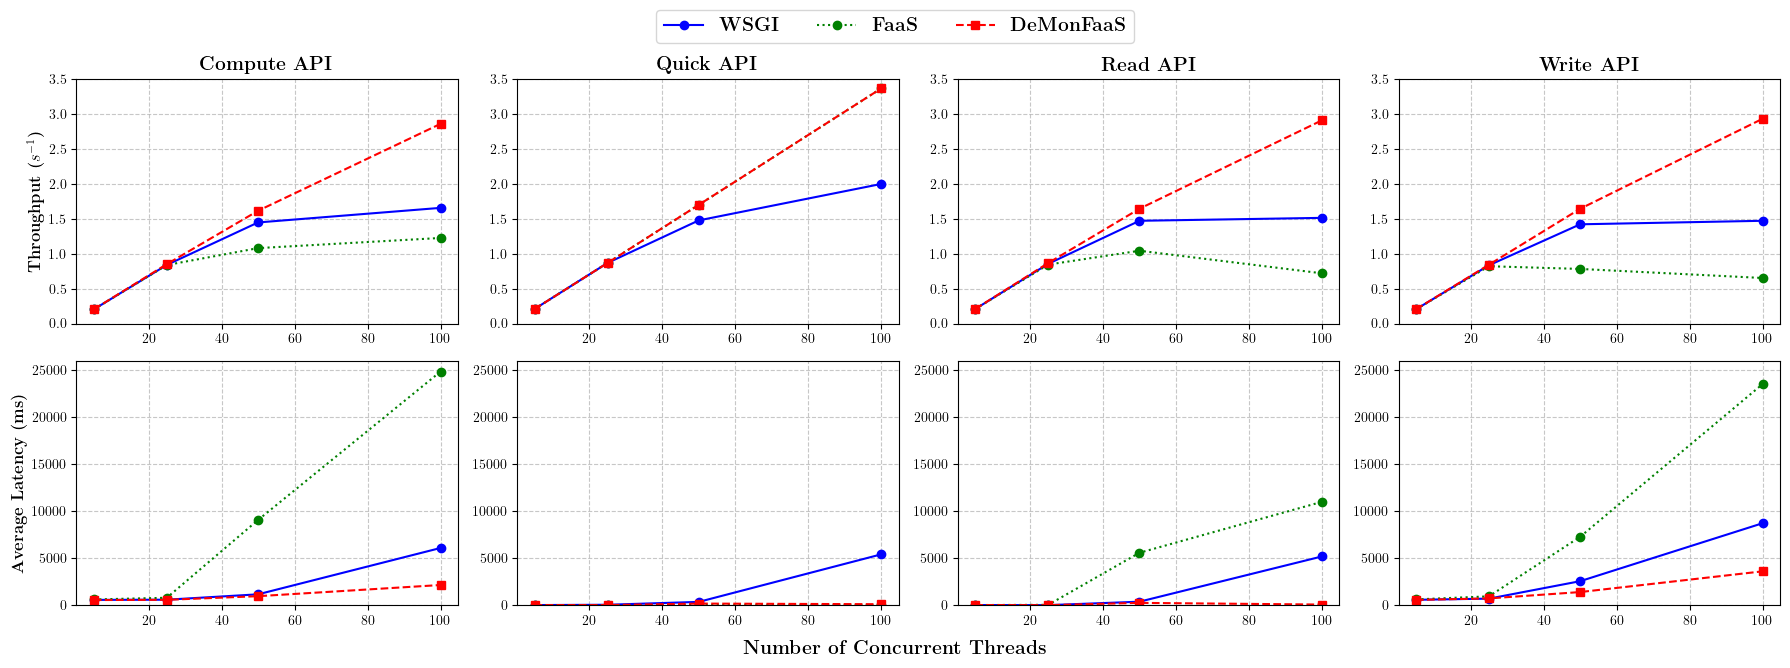

In [506]:
import matplotlib.pyplot as plt

# Predefined color scheme for consistency across all subplots
color_scheme = {
    'Kube': 'blue',
    'FaaS': 'green',
    'Algo': 'red'
}

# Subplot setup
fig, axes = plt.subplots(2, len(unique_labels), figsize=(18, 6))

# Plot each benchmark
for j in range(2):
    for i, label in enumerate(unique_labels):
        ax = axes[j][i]  # Get the subplot for the current benchmark
        
        # Filter data for the current label across all concurrency levels
        kube_data = kube[kube['Label'].str.contains(label)]
        faas_data = faas[faas['Label'].str.contains(label)]
        algo_data = algo[algo['Label'].str.contains(label)]  # Assuming 'algo' dataset exists
        
        # Plot Kube data as a single line
        if not kube_data.empty:
            ax.plot(
                kube_data['# Samples'],
                kube_data['Throughput' if j == 0 else 'Average'],
                marker='o',
                color=color_scheme['Kube'],
                label=r'\textbf{WSGI}'
            )
        
        # Plot FaaS data as a single line
        if not faas_data.empty:
            ax.plot(
                faas_data['# Samples'],
                faas_data['Throughput' if j == 0 else 'Average'],
                marker='o',
                linestyle=':',
                color=color_scheme['FaaS'],  # Same color as Kube counterpart
                label=r'\textbf{FaaS}'
            )
        
        # Plot Algo data as a single line (assuming algo dataset exists)
        if not algo_data.empty:
            ax.plot(
                algo_data['# Samples'],
                algo_data['Throughput' if j == 0 else 'Average'],
                marker='s',  # Square marker for Algo
                color=color_scheme['Algo'],  # Same color for Algo
                linestyle='--',
                label=r'\textbf{DeMonFaaS}'
            )

        # Set title and labels for each subplot
        ax.set_title(rf'\textbf{{{label}}}' if j==0 else '', fontsize=14)
        # ax.set_xlabel('Number of Samples' if j==0 else '', fontsize=10)
        if j ==0 and i == 0:
            ax.set_ylabel(r'\textbf{Throughput ($s^{-1}$)}', fontsize=12)
        elif j == 1 and i == 0:
            ax.set_ylabel(r'\textbf{Average Latency (ms)}', fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.7)
        if j == 0:
            ax.set_ylim(0, 3.5)
        else:
            ax.set_ylim(0, 26000)

# Adjust layout and show the plot


# Common legend for all subplots
# handles, _ = ax.get_legend_handles_labels()
# fig.legend(handles, label, loc='upper center', fontsize=14, ncol=3, )
# Custom legend location
handles, labels = ax.get_legend_handles_labels()
# labels = ['WSGI','FaaS','DeMonFaaS']
fig.legend(handles, labels, loc='upper center', fontsize=14, ncol=3, bbox_to_anchor=(0.5, 1.07))
fig.tight_layout()
plt.text(0.5, -0.02, r'\textbf{Number of Concurrent Threads}', horizontalalignment='center', fontsize=14, transform = fig.transFigure)

# Show the plot
plt.tight_layout()
plt.savefig('combined-comparison.pdf', dpi=300, bbox_inches='tight')
plt.show()
